In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import false
import scipy.stats as stats

station = pd.read_csv("./094/station.csv", sep='\t')
patient = pd.read_csv("./094/patient.csv", sep='\t')
observation = pd.read_csv("./094/observation.csv", sep='\t')

(B-1b)

In [182]:
skin_temp = observation["Skin Temperature"]
spo = observation["SpO₂"]
hr =  observation["HR"]
pi = observation["PI"]
rr = observation["RR"]  
prv = observation["PRV"]
bp = observation["BP"]
pvi = observation["PVI"]
sv = observation["SV"]
co = observation["CO"]

In [183]:
cols = ["Skin Temperature", "SpO₂", "HR", "PI", "RR", "PRV", "BP", "PVI", "SV", "CO"]
observation[cols].describe()

,Skin Temperature,SpO₂,HR,PI,RR,PRV,BP,PVI,SV,CO
count,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000
mean,35.991422,97.543356,79.413685,8.712491,16.136178,117.625701,104.439286,15.327157,80.861939,4.099589
std,0.841526,0.604163,4.958332,3.500894,1.031022,21.832746,4.083631,1.582654,4.996021,0.134870
min,33.000000,95.000000,60.000000,0.200000,12.000000,20.000000,90.000000,10.000000,60.000000,4.000000
25%,35.348685,97.143688,76.070752,5.904762,15.451710,103.013231,101.692402,14.141627,77.522258,4.029280
50%,36.133526,97.548163,79.408554,8.129926,16.136063,117.650792,104.383271,15.373838,80.813695,4.059159
75%,36.644071,97.952928,82.767663,11.658857,16.828594,132.126611,107.208491,16.623524,84.290286,4.118594
max,38.000000,100.000000,100.000000,20.000000,20.000000,200.000000,120.000000,20.000000,100.000000,8.000000


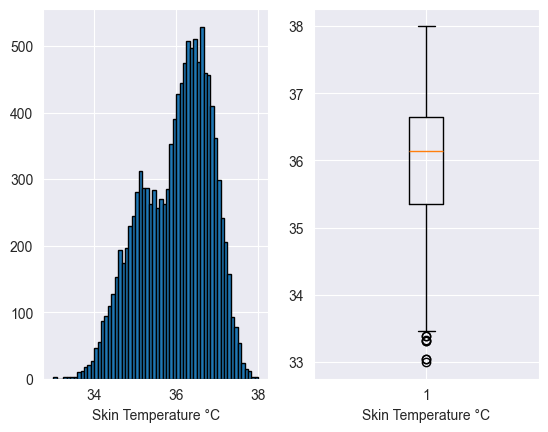

In [184]:
plt.subplot(1, 2, 1)
plt.hist(skin_temp, bins=60, edgecolor="black")
plt.xlabel("Skin Temperature °C")


plt.subplot(1, 2, 2)
plt.boxplot(skin_temp)
plt.xlabel("Skin Temperature °C")

plt.show()
# The temperature values are in a range 33-38 °C, mean: 35.9 °C and std: 0.84
# This indicates that measurements are within the normal range and do not vary significantly

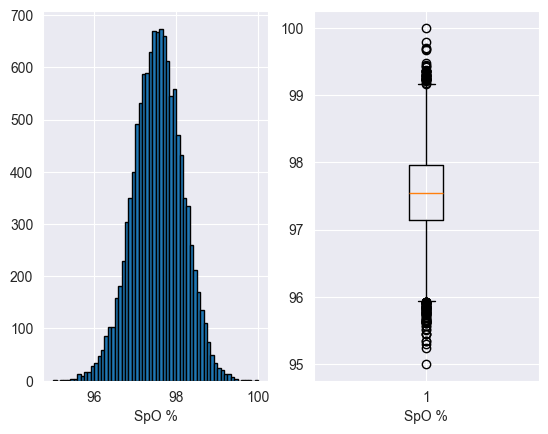

In [185]:
plt.subplot(1, 2, 1)
plt.hist(spo, bins=60, edgecolor="black")
plt.xlabel("SpO %")


plt.subplot(1, 2, 2)
plt.boxplot(spo)
plt.xlabel("SpO %")

plt.show()

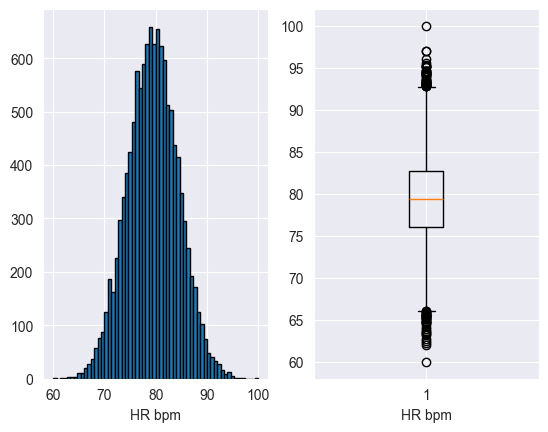

In [186]:
plt.subplot(1, 2, 1)
plt.hist(hr, bins=60, edgecolor="black")
plt.xlabel("HR bpm")

plt.subplot(1, 2, 2)
plt.boxplot(hr)
plt.xlabel("HR bpm")

plt.show()

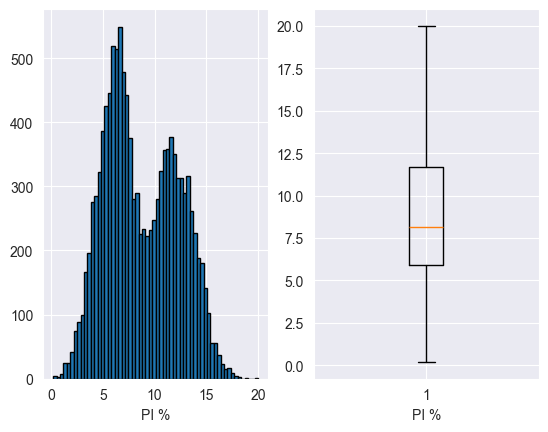

In [187]:
plt.subplot(1, 2, 1)
plt.hist(pi, bins=60, edgecolor="black")
plt.xlabel("PI %")

plt.subplot(1, 2, 2)
plt.boxplot(pi)
plt.xlabel("PI %")

plt.show()

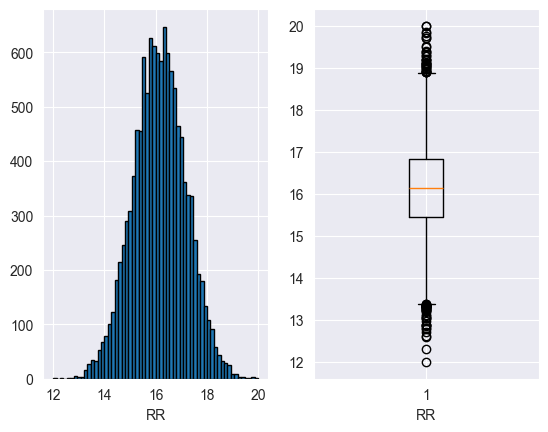

In [188]:
plt.subplot(1, 2, 1)
plt.hist(rr, bins=60, edgecolor="black")
plt.xlabel("RR")

plt.subplot(1, 2, 2)
plt.boxplot(rr)
plt.xlabel("RR")

plt.show()

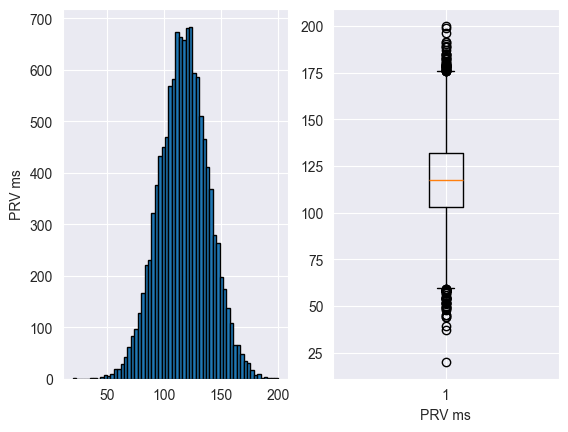

In [189]:
plt.subplot(1, 2, 1)
plt.hist(prv, bins=60, edgecolor="black")
plt.ylabel("PRV ms")

plt.subplot(1, 2, 2)
plt.boxplot(prv)
plt.xlabel("PRV ms")

plt.show()
# Pulse rate variability are in a range 20-200ms, mean: 117.62, std: 21.83
# This indicates that the average value is within the normal range, but some values are widely scattered

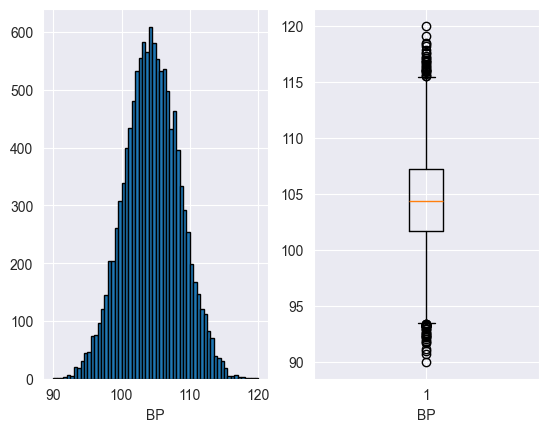

In [190]:
plt.subplot(1, 2, 1)
plt.hist(bp, bins=60, edgecolor="black")
plt.xlabel("BP")

plt.subplot(1, 2, 2)
plt.boxplot(bp)
plt.xlabel("BP")

plt.show()

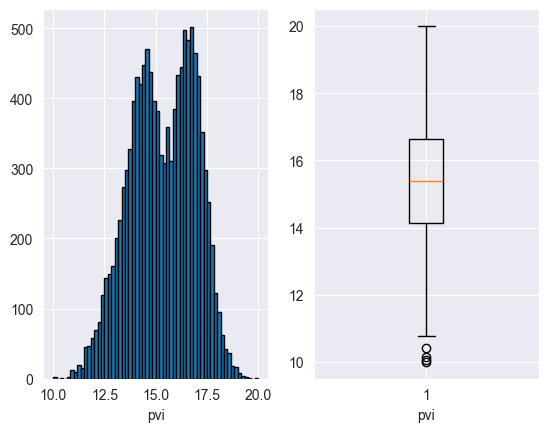

In [191]:
plt.subplot(1, 2, 1)
plt.hist(pvi, bins=60, edgecolor="black")
plt.xlabel("pvi")

plt.subplot(1, 2, 2)
plt.boxplot(pvi)
plt.xlabel("pvi")

plt.show()

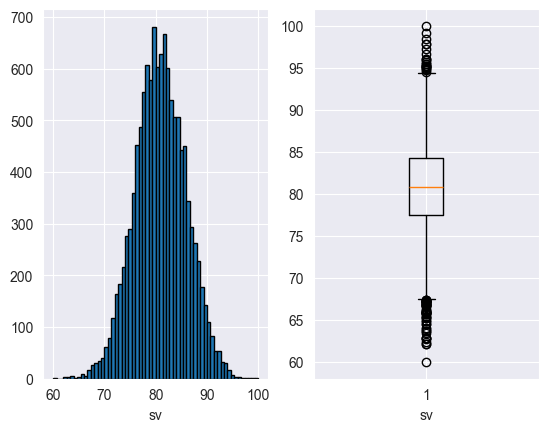

In [192]:
plt.subplot(1, 2, 1)
plt.hist(sv, bins=60, edgecolor="black")
plt.xlabel("sv")

plt.subplot(1, 2, 2)
plt.boxplot(sv)
plt.xlabel("sv")

plt.show()

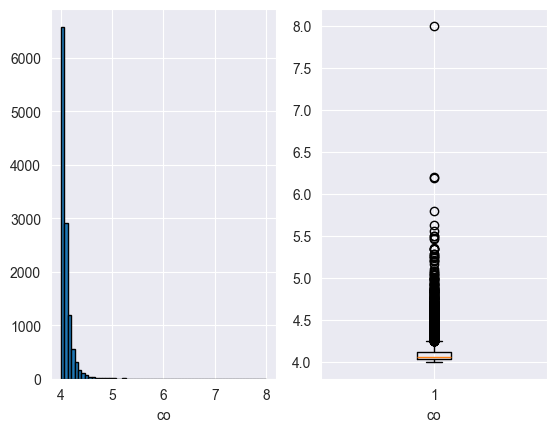

In [193]:
plt.subplot(1, 2, 1)
plt.hist(co, bins=60, edgecolor="black")
plt.xlabel("co")

plt.subplot(1, 2, 2)
plt.boxplot(co)
plt.xlabel("co")

plt.show()

## (D-1b)

In [194]:
corr = observation.corr(numeric_only=False)
corr['oximetry'].sort_values()

SpO₂                    -0.121493
PI                      -0.093795
SV                      -0.008412
PRV                     -0.008249
RR                      -0.007365
latitude                -0.007289
Respiratory effort      -0.005237
Blood Flow Index        -0.000773
longitude               -0.000683
BP                       0.000745
Signal Quality Index     0.002155
PPG waveform features    0.002664
Hb level                 0.004894
O₂ extraction ratio      0.005265
FiO₂                     0.006180
HR                       0.008207
CO                       0.009428
SNR                      0.010472
Motion/Activity index    0.028967
EtCO₂                    0.281626
Skin Temperature         0.368207
PVI                      0.666416
oximetry                 1.000000
Name: oximetry, dtype: float64

Text(0, 0.5, 'oximetry')

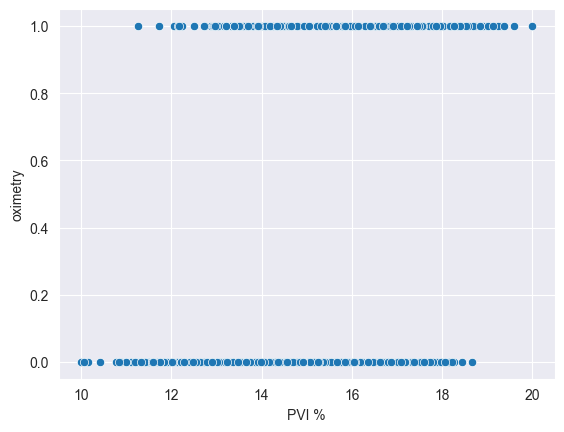

In [195]:
sns.scatterplot(data=observation, x='PVI', y='oximetry')
plt.xlabel("PVI %")
plt.ylabel("oximetry")

Text(0, 0.5, 'oximetry')

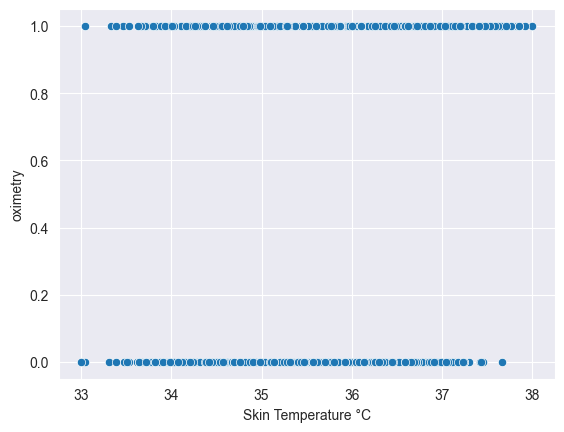

In [196]:
sns.scatterplot(data=observation, x='Skin Temperature', y='oximetry')
plt.xlabel("Skin Temperature °C")
plt.ylabel("oximetry")

Text(0, 0.5, 'oximetry')

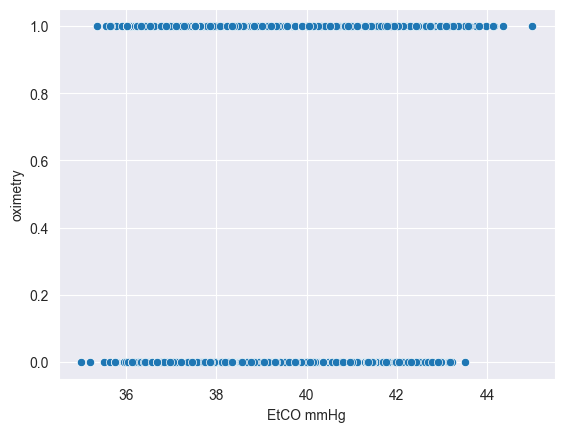

In [197]:
sns.scatterplot(data=observation, x='EtCO₂', y='oximetry')
plt.xlabel("EtCO mmHg")
plt.ylabel("oximetry")

Text(0, 0.5, 'oximetry')

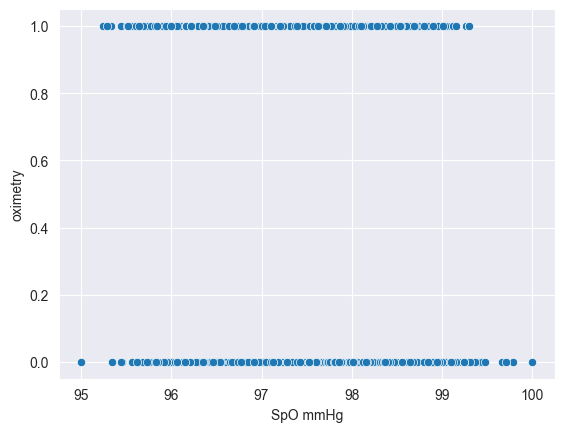

In [218]:
sns.scatterplot(data=observation, x='SpO₂', y='oximetry')
plt.xlabel("SpO mmHg")
plt.ylabel("oximetry")

## (E-1b)

После предварительно анализа можно увидеть что СO и HR зависят между сообой очень сильно (r = 0.76). Наша целевая переменная **oximetry** зависит от PVI (r = 0.66), Skin Temperature (r = 0.368), **$EtCO₂$** (r = 0.281) а так же негативную корреляцию с **$SpO_2$** (r = -0.121). Так же датасеты между собой связывать не надо так как вся информация которая нам нужна уже находиться в датасете **observation**. 

## (A-2b)

Check data types

In [198]:
observation.dtypes

SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
oximetry                 float64
latitude                 float64
longitude                float64
dtype: object

In [199]:
station.dtypes

longitude    float64
revision      object
station       object
QoS           object
latitude     float64
location      object
dtype: object

In [200]:
patient.dtypes

current_location     object
user_id               int64
job                  object
ssn                  object
blood_group          object
company              object
name                 object
address              object
mail                 object
registration         object
username             object
residence           float64
station_ID            int64
dtype: object

Format data types

In [201]:
station['revision'] = pd.to_datetime(station['revision'], format="mixed")
station['station'] = station['station'].astype('string')
station['QoS'] = station['QoS'].astype('category')
station['location'] = station['location'].astype('string')

In [202]:
patient['job'] = patient['job'].astype('string')
patient['ssn'] = patient['ssn'].astype('string')
patient['blood_group'] = patient['blood_group'].astype('category')
patient['company'] = patient['company'].astype('string')
patient['name'] = patient['name'].astype('string')
patient['username'] = patient['username'].astype('string')
patient['residence'] = patient['residence'].astype('string')
patient['registration'] = patient['registration'].astype('string')
patient['address'] = patient['address'].astype('string')
patient['mail'] = patient['mail'].astype('string')
patient[['longitude', 'latitude']] = (
    patient['current_location']
    .astype(str)
    .str.extract(r"Decimal\('([\d\.\-]+)'\), Decimal\('([\d\.\-]+)'\)")
    .astype(float)
)
patient.drop(columns=['current_location'], inplace=True)

Check nulls

In [203]:
observation.isnull().sum()

SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level                 0
SV                       0
CO                       0
Blood Flow Index         0
PPG waveform features    0
Signal Quality Index     0
Respiratory effort       0
O₂ extraction ratio      0
SNR                      0
oximetry                 0
latitude                 0
longitude                0
dtype: int64

In [204]:
station.isnull().sum()

longitude    0
revision     0
station      0
QoS          0
latitude     0
location     0
dtype: int64

In [205]:
patient.isnull().sum()

user_id            0
job             1471
ssn                0
blood_group        0
company            0
name               0
address          315
mail               0
registration       0
username           0
residence       2102
station_ID         0
longitude        105
latitude         105
dtype: int64

In [206]:
patient['residence'] = patient['residence'].fillna('Unknown')
patient['job'] = patient['job'].fillna('Unknown')
patient['address'] = patient['address'].fillna('Unknown')
patient['longitude'] = patient['longitude'].fillna(0)
patient['latitude'] = patient['latitude'].fillna(0)

Check duplicates

In [207]:
observation.duplicated().sum()

np.int64(1)

In [208]:
observation = observation.drop_duplicates()

In [209]:
station.duplicated().sum()

np.int64(0)

In [210]:
patient.duplicated().sum()

np.int64(0)

## (C-1b)

In [211]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [212]:
co_out = identify_outliers(co)
co = co.drop(co_out.index)

pvi_out = identify_outliers(pvi)
pvi = pvi.drop(pvi_out.index)

sv_out = identify_outliers(sv)
sv = sv.drop(sv_out.index)

bp_out = identify_outliers(bp)
bp = bp.drop(bp_out.index)

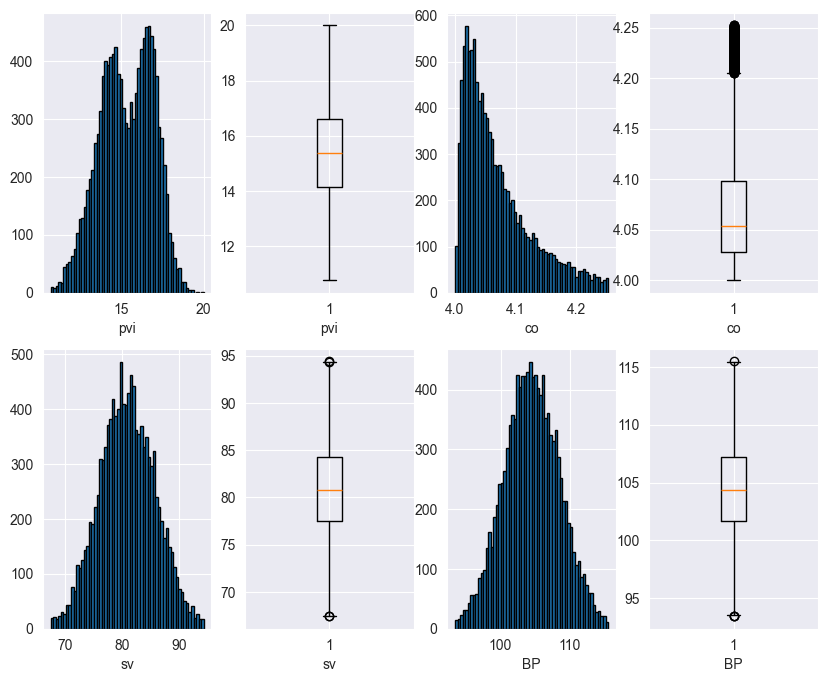

In [213]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 4, 1)
plt.hist(pvi, bins=60, edgecolor="black")
plt.xlabel("pvi")

plt.subplot(2, 4, 2)
plt.boxplot(pvi)
plt.xlabel("pvi")

plt.subplot(2, 4, 3)
plt.hist(co, bins=60, edgecolor="black")
plt.xlabel("co")

plt.subplot(2, 4, 4)
plt.boxplot(co)
plt.xlabel("co")

plt.subplot(2, 4, 5)
plt.hist(sv, bins=60, edgecolor="black")
plt.xlabel("sv")

plt.subplot(2, 4, 6)
plt.boxplot(sv)
plt.xlabel("sv")

plt.subplot(2, 4, 7)
plt.hist(bp, bins=60, edgecolor="black")
plt.xlabel("BP")

plt.subplot(2, 4, 8)
plt.boxplot(bp)
plt.xlabel("BP")


plt.show()

In [214]:
def replace_outliers(a):
    lower = a.quantile(0.05)
    upper = a.quantile(0.95)
    
    clipped = a.clip(lower, upper)
    
    return clipped

In [215]:
prv = replace_outliers(prv)

skin_temp = replace_outliers(skin_temp)

hr = replace_outliers(hr)

spo = replace_outliers(spo)

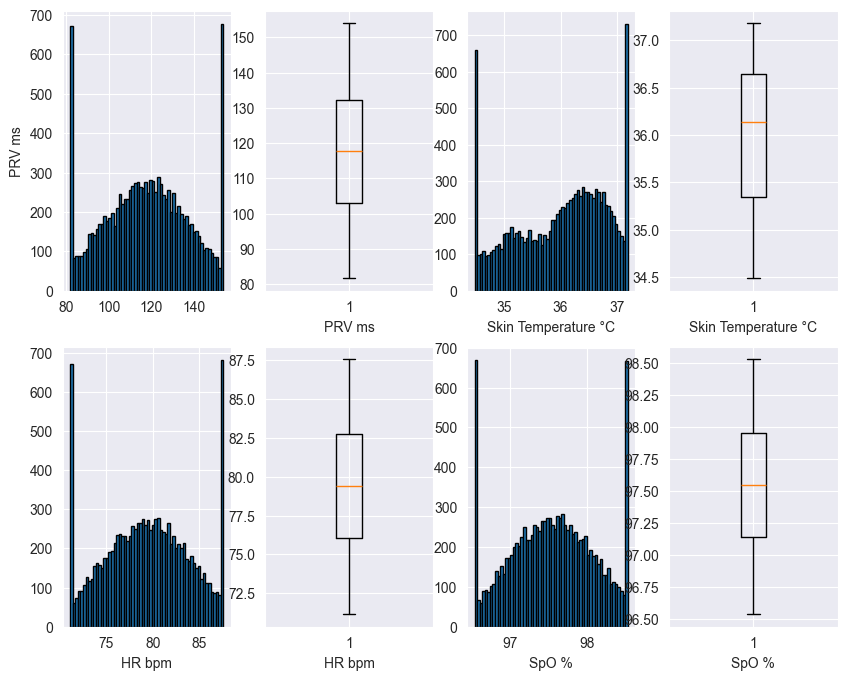

In [216]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 4, 1)
plt.hist(prv, bins=60, edgecolor="black")
plt.ylabel("PRV ms")

plt.subplot(2, 4, 2)
plt.boxplot(prv)
plt.xlabel("PRV ms")

plt.subplot(2, 4, 3)
plt.hist(skin_temp, bins=60, edgecolor="black")
plt.xlabel("Skin Temperature °C")

plt.subplot(2, 4, 4)
plt.boxplot(skin_temp)
plt.xlabel("Skin Temperature °C")

plt.subplot(2, 4, 5)
plt.hist(hr, bins=60, edgecolor="black")
plt.xlabel("HR bpm")

plt.subplot(2, 4, 6)
plt.boxplot(hr)
plt.xlabel("HR bpm")

plt.subplot(2, 4, 7)
plt.hist(spo, bins=60, edgecolor="black")
plt.xlabel("SpO %")


plt.subplot(2, 4, 8)
plt.boxplot(spo)
plt.xlabel("SpO %")

plt.show()